# **ДЗ к уроку 7**

**Задание 1.**


Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

**Решение.**

**Вариант 1.**
Согласно модели линейной регрессии (с интерсептом):
$$y = a+b*x$$

рассчитаем коэффициенты *b* и *a* по формулам:
$$b = (np.mean(X * y) - np.mean(X) * np.mean(y)) / (np.mean(X^2) - np.mean(X)^2) = 2.6205$$
$$a = np.mean(y) - b * np.mean(X) = 444.1774$$
Получим итоговую модель линейной регрессии:
$$\hat{y} = 444.1774+2.6205*x$$


**Вариант 2. Расчет матричным методом  (с интерсептом)**

Расчет произведем по формуле:
$$\hat{B}=(X^T∗X)^{−1}∗X^T∗Y$$

и рассчитаем коэффициенты *b* и *a* матрицы B_hat (с интерсептом):

array([[444.17735732],[  2.62053888]])

**Вариант 2. Расчет матричным методом  (без интерсепта)**

Расчет произведем по формуле:
$$\hat{B}=(X^T∗X)^{−1}∗X^T∗Y$$

и рассчитаем коэффициент *b* матрицы B_hat (без интерсепта):

array([[5.88982042]])

In [9]:
import numpy as np
import pandas as pd

In [10]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

X = np.copy(zp)
y = np.copy(ks)

# Количество измерений zp
n = X.size
print(n)

# Среднее арифметическое zp
X_mean = X.sum() / n
print(X_mean)

# Расчет коэффициента b
b = (np.mean(X * y) - np.mean(X) * np.mean(y)) / (np.mean(X**2) - np.mean(X)**2)
print("b =", b)
b1 = (n * (np.sum(X * y)) - (np.sum(X) * np.sum(y))) / (n * np.sum(X**2) - np.sum(X)**2)
print("b1 =", b1)

# Расчет коэффициента a
a = np.mean(y) - b * np.mean(X)
print("a =", a)
a1 = (np.sum(y) - b * np.sum(X)) / n
print("a1 =", a1)

print('Количество измерений zp:\t\t\t', n)
print('Среднее значение zp:\t\t\t\t', X.mean())
print('Угол наклона (коэффициент b) :\t\t\t', b)
print('Интерсепт (коэффициент a) :\t\t\t', a)

# Проверка
print('====================================================================')
print('Проверка: y = {0} + {1} * x'.format(a, b))
for i in range(0, n):
    print('- при X(zp)={0} y(ks)={1} (расчитанное : {2}, расхождение : {3:4.2f}%)'.format(
        X[i], y[i], a + b * X[i], (1 - y[i] / (a + b * X[i])) * 100))


10
101.4
b = 2.620538882402765
b1 = 2.6205388824027653
a = 444.1773573243596
a1 = 444.1773573243596
Количество измерений zp:			 10
Среднее значение zp:				 101.4
Угол наклона (коэффициент b) :			 2.620538882402765
Интерсепт (коэффициент a) :			 444.1773573243596
Проверка: y = 444.1773573243596 + 2.620538882402765 * x
- при X(zp)=35 y(ks)=401 (расчитанное : 535.8962182084564, расхождение : 25.17%)
- при X(zp)=45 y(ks)=574 (расчитанное : 562.101607032484, расхождение : -2.12%)
- при X(zp)=190 y(ks)=874 (расчитанное : 942.0797449808849, расхождение : 7.23%)
- при X(zp)=200 y(ks)=919 (расчитанное : 968.2851338049126, расхождение : 5.09%)
- при X(zp)=40 y(ks)=459 (расчитанное : 548.9989126204703, расхождение : 16.39%)
- при X(zp)=70 y(ks)=739 (расчитанное : 627.6150790925532, расхождение : -17.75%)
- при X(zp)=54 y(ks)=653 (расчитанное : 585.686456974109, расхождение : -11.49%)
- при X(zp)=150 y(ks)=902 (расчитанное : 837.2581896847744, расхождение : -7.73%)
- при X(zp)=120 y(ks)=746 (расчи

In [11]:
# Расчет матричным методом с интерсептом
import seaborn as sns


X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

X = X.reshape((n, 1)) # транспонирование матрицы X
y = y.reshape((n, 1)) # транспонирование матрицы y
X = np.hstack([np.ones((n, 1)), X]) # добавление столбца единиц в матрицу X
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T @ y) # формула B
B


array([[444.17735732],
       [  2.62053888]])

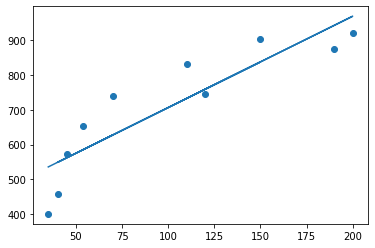

[ 35  45 190 200  40  70  54 150 120 110]
[401 574 874 919 459 739 653 902 746 832]


In [12]:
import matplotlib.pyplot as plt


plt.scatter(zp, ks)
plt.plot(zp, 444.1774 + 2.6205 * zp)
plt.show()
print(zp)
print(ks)


In [13]:
# Расчет матричным методом без интерсепта
import seaborn as sns


X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

X = X.reshape((n, 1)) # транспонирование матрицы X
y = y.reshape((n, 1)) # транспонирование матрицы y
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T @ y) # формула B
B


array([[5.88982042]])

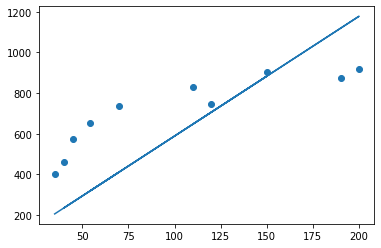

[ 35  45 190 200  40  70  54 150 120 110]
[401 574 874 919 459 739 653 902 746 832]


In [15]:
import matplotlib.pyplot as plt


plt.scatter(zp, ks)
plt.plot(zp, 5.8898 * zp)
plt.show()
print(zp)
print(ks)


**Задание 2.**


Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

**Решение.**

Используем модель  (без intercept): y_hat = B1 * X

Используем метод градиентного спуска, считая среднеквадратичной функцию потерь по формуле:

mse = ((b * x - y_hat)**2).sum() / n

и производную для определения локального минимума (экстремума):

mse_ = 2 * ((b * x - y_hat) * x).sum() / n

Получим при скорости обучения alfa=1e-6 и начальном значении B1=0.1:

$$B1=5.940918$$

In [5]:
# Метод расчета mean square error (mse)
def  mse_(B1,  y = y, X = X, n = 10):
    return np.sum((B1 * X - y)**2) / n
	

# Скорость обучения alfa
alfa = 1e-6

# Начальное значение B1
B1 = 0.1

# Поиск наименьшей mse градиентным методом (методом спуска)
for i in range(1000):
    B1 -= alfa * (2 / n) * np.sum((B1 * X - y) * X)
    if i % 100 == 0:
        print('Итерация: {0}, B1={1}, mse={2}'.format(i, B1, mse_(B1)))

#  Проверка
mse_(5.9409185)

Итерация: 0, B1=0.26094768, mse=1027073.9973981536
Итерация: 100, B1=5.593508888000083, mse=584242.9745381855
Итерация: 200, B1=5.919669627558069, mse=582586.3285757308
Итерация: 300, B1=5.939618920942537, mse=582580.1310066734
Итерация: 400, B1=5.940839099395277, mse=582580.107821356
Итерация: 500, B1=5.940913730382343, mse=582580.1077346189
Итерация: 600, B1=5.9409182951115564, mse=582580.1077342944
Итерация: 700, B1=5.940918574308627, mse=582580.1077342933
Итерация: 800, B1=5.940918591385435, mse=582580.1077342934
Итерация: 900, B1=5.940918592429921, mse=582580.1077342932


582580.1077342934

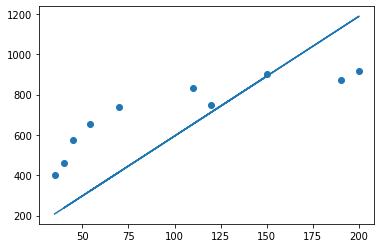

In [6]:
plt.scatter(zp, ks)
plt.plot(zp, 5.940918 * zp)
plt.show()

**Задание 3.**

В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?


**Ответ.**

При известной дисперсии генеральной совокупности используется таблица значений функции Лапласа для определения Z-значений (Z-критерия) для подставновки в формулу определения доверительного интервала: $$\bar{X}\ \ \pm\ Z_{{\alpha}/{2}}\ \ast\ {\sigma}/{\sqrt n}$$

При неизвестной дисперсии генеральной совокупности используется таблица критических точек распределения Стьюдента для определения t-значений (t-критерия) для подставновки в формулу определения доверительного интервала: $$\bar{X}\ \ \pm\ t_{{\alpha}/{2}}\ \ast\ {\sigma}/{\sqrt n}$$


**Задание 4.**

Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

**Решение.**

Используем модель (с intercept): y_hat = B0 + B1 * X

Используем метод градиентного спуска, считая среднеквадратичной функцию потерь по формуле:

mse = ((b0 + b1 * x - y_hat)**2).sum() / n

и производную для определения локального минимума (экстремума):

B0: mse_ = 2 * (b0 + b * x - y_hat).sum() / n

B1: mse_ = 2 * ((b0 + b1 * x - y_hat) * x).sum() / n

Получим при скорости обучения alfa=1e-6 и начальном значении B1=0.1:

$$B0 = ; B1= ;$$

In [ ]:
# Метод расчета mean square error (mse)
def  mse_(B0, B1,  y = y, X = X, n = 10):
    return np.sum((B0 + B1 * X - y)**2) / n
	

# Минимальное значение
min = 1e6

# Скорость обучения alfa
alfa = 1e-6

# Начальное значение B0
B0 = 400.0

# Начальное значение B1
B1 = 0.1

# Поиск наименьшей mse градиентным методом (методом спуска)
for i in range(10000):
    B0 -= alfa * (2 / n) * np.sum(B0 + B1 * X - y)
    for i in range(1000):
        B1 -= alfa * (2 / n) * np.sum((B0 + B1 * X - y) * X)
        if mse_(B0, B1) > min:
            B1 += alfa * (2 / n) * np.sum((B0 + B1 * X - y) * X)
            break
        elif mse_(B0, B1) < min:
            min = mse_(B0, B1)
        if i % 100 == 0:
            print('Итерация: {0}, B0={1}, B1={2}, mse={3}'.format(i, B0, B1, mse_(B0, B1)))
    if mse_(B0, B1) > min:
        B0 += alfa * (2 / n) * np.sum(B0 + B1 * X - y)
        break
    elif mse_(B0, B1) < min:
        min = mse_(B0, B1)

#  Проверка
#mse_(5.9409185)

Итерация: 0, B0=400.00121912, B1=0.179027430324224, mse=238812.48072971217
Итерация: 100, B0=400.00121912, B1=2.797385205440251, mse=132048.60836335947
Итерация: 200, B0=400.00121912, B1=2.9575344236204453, mse=131649.20107488747
Итерация: 300, B0=400.00121912, B1=2.9673297893750705, mse=131647.70687859668
Итерация: 400, B0=400.00121912, B1=2.9679289130633237, mse=131647.70128875738
Итерация: 500, B0=400.00121912, B1=2.9679655578607536, mse=131647.7012678456


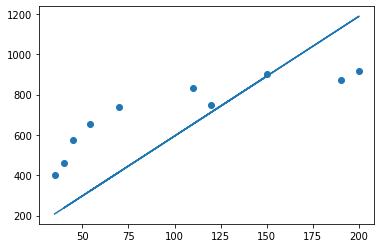

In [ ]:
plt.scatter(zp, ks)
plt.plot(zp, 5.940918 * zp)
plt.show()